## Assignment 6 (Friedman test)

Goal of the assignment is to ccheck wether all algorithms perform the same across different datasets using Friedman's test

In [1]:
import pandas as pd
from scipy.stats import friedmanchisquare
from scikit_posthocs import posthoc_nemenyi_friedman
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_path = 'C:/Users/anast/OneDrive/Desktop/MSc/MachineLearning/Assignments/Asgmt6_ModelEvaluation/'
data_file = 'algo_performance.csv'

data = pd.read_csv(data_path+data_file)

The Friedman test is the nonparametric version of the repeated measures analysis of variance test, or repeated measures ANOVA.

The default assumption, or null hypothesis, is that the multiple paired samples have the same distribution. A rejection of the null hypothesis indicates that one or more of the paired samples has a different distribution.

**Fail to Reject H0**: Paired sample distributions are equal.    
**Reject H0**: Paired sample distributions are not equal.     
The test assumes two or more paired data samples with 10 or more samples per group.

A more detailed analysis can be found [here](https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/).

In [3]:
stat, p = friedmanchisquare(data['C4.5'], data['1-NN'], data['NaiveBayes'], data['Kernel'], data['CN2'])

print(f'Test statistic={stat:.3f} and p value={p:3f}.')
print(f'For alpha values > {p} the data appear to follow different distributions (reject H0). \nFor all other values we cannot reject H0. \n')

Test statistic=39.913 and p value=0.000000.
For alpha values > 4.512033059024698e-08 the data appear to follow different distributions (reject H0). 
For all other values we cannot reject H0. 



In our case and for alpha=0.01 the test rejects H0.   
We can find which algorithms have statistical significant differences with [Nemenyi](https://github.com/maximtrp/scikit-posthocs) test.

In [4]:
posthoc = posthoc_nemenyi_friedman(data)

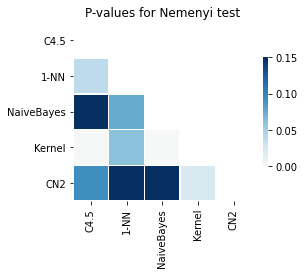

In [5]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(posthoc, dtype=bool))

f, ax = plt.subplots(figsize=(4,4))

sns.heatmap(posthoc, mask=mask, cmap='RdBu', vmax=.15, vmin=0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('P-values for Nemenyi test')
plt.show()

Example: At significance level a=.05 C4.5, NaiveBayes and CN2 results seem to come from the same distribution (cannot reject H0).